In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

In [94]:
df = pd.read_csv("./ParisHousing.csv")
print("Number of columns: ",len(df.columns))
print("Columns \n", df.columns)

print(df.head(3))

Number of columns:  17
Columns 
 Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0      

In [93]:
print(df.dtypes)

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object


In [96]:
print(df.isna().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


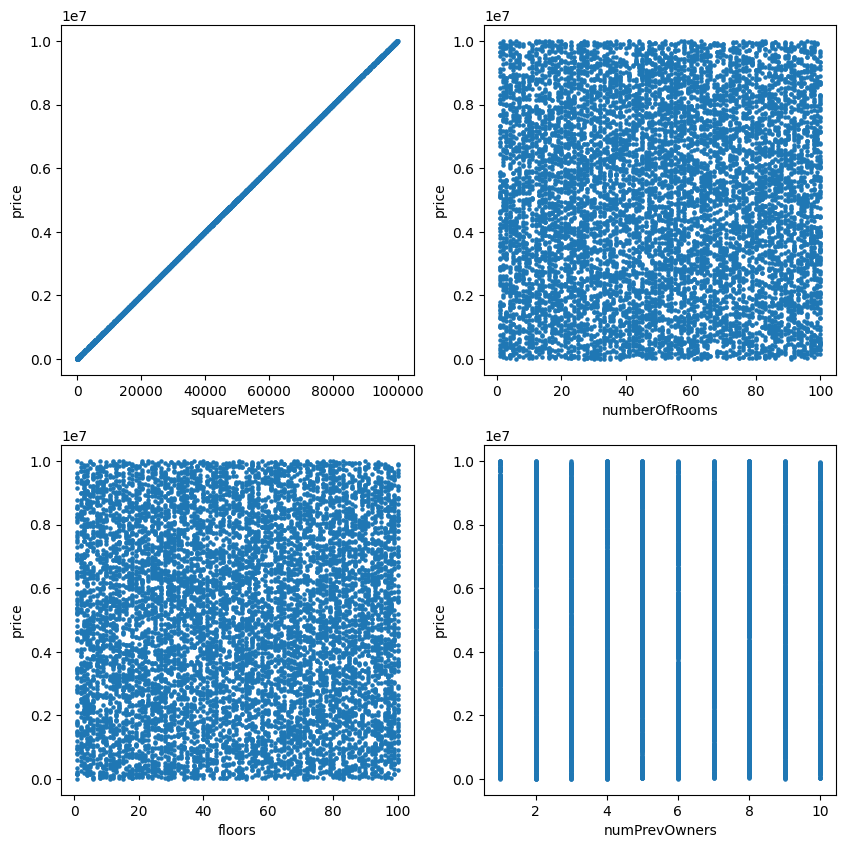

In [34]:
pairs = ['squareMeters', 'numberOfRooms', "floors", "numPrevOwners"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

counter = 0
for x in pairs:
    ax[counter // 2, counter % 2].scatter(df[x], df["price"], s=5)
    ax[counter // 2, counter % 2].set_xlabel(x)
    ax[counter // 2, counter % 2].set_ylabel("price")
    counter+=1


In [58]:
cols = list(df.columns)
features = df[cols[0:5] + cols[6:8] + cols[9:-1]]
label = df["price"]
print(features.head(3))
print(label.head(3))

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2)


   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityPartRange  \
0         75523              3        0        1      63              3   
1         80771             39        1        1      98              8   
2         55712             58        0        1      19              6   

   numPrevOwners  isNewBuilt  hasStormProtector  basement  attic  garage  \
0              8           0                  1      4313   9005     956   
1              6           1                  0      3653   2436     128   
2              8           0                  0      2937   8852     135   

   hasStorageRoom  hasGuestRoom  
0               0             7  
1               1             2  
2               1             9  
0    7559081.5
1    8085989.5
2    5574642.1
Name: price, dtype: float64


In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lr = LinearRegression().fit(X_train, y_train)

(8000, 14) (8000,)
(2000, 14) (2000,)


In [91]:
print("Training set score",lr.score(X_train, y_train))
print("Test set score", lr.score(X_test, y_test))

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    print("--Making 10 prediction--")
    for i in range(10):
        feature_pre = np.array(X_test.iloc[i,:])
        feature_pre = feature_pre.reshape(1,-1)
        prediction = lr.predict(feature_pre)
        print("expected value:" , y_test.iloc[i] , "predicted value:" , prediction[0])

    

Training set score 0.9999995671220456
Test set score 0.9999995565118068
--Making 10 prediction--
expected value: 6267676.0 predicted value: 6264820.341207678
expected value: 8721274.8 predicted value: 8720052.87476656
expected value: 5978589.9 predicted value: 5978998.501766071
expected value: 9660809.8 predicted value: 9663837.72020517
expected value: 9627880.0 predicted value: 9627503.753763042
expected value: 5836642.2 predicted value: 5835634.2358070705
expected value: 2873058.5 predicted value: 2874683.6680158973
expected value: 8553308.3 predicted value: 8554425.196989525
expected value: 472741.0 predicted value: 474313.0667748521
expected value: 5407486.4 predicted value: 5407953.797387645
